# Source: [Andrey Kaparthy](https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&ab_channel=AndrejKarpathy)

In [1]:
%load_ext watermark
%watermark -v -p numpy,pandas,polars,torch,lightning --conda

Python implementation: CPython
Python version       : 3.11.8
IPython version      : 8.22.2

numpy    : 1.26.4
pandas   : 2.2.1
polars   : 0.20.18
torch    : 2.2.2
lightning: 2.2.1

conda environment: torch_p11



In [2]:
# Built-in library
from pathlib import Path
import re
import json
from typing import Any, Optional, Sequence, TypeAlias, Union
import logging
import warnings

# Standard imports
import numpy as np
import numpy.typing as npt
from pprint import pprint
import pandas as pd
import polars as pl
from rich.console import Console
from rich.theme import Theme

custom_theme = Theme(
    {
        "info": "#76FF7B",
        "warning": "#FBDDFE",
        "error": "#FF0000",
    }
)
console = Console(theme=custom_theme)

# Visualization
import matplotlib.pyplot as plt


# Pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 600

warnings.filterwarnings("ignore")


# Black code formatter (Optional)
%load_ext lab_black

# auto reload imports
%load_ext autoreload
%autoreload 2

In [3]:
from micrograd.basetype import Value
from micrograd.plot import draw_dot
from micrograd.nn import Neuron, Layer, MLP

Value(data=11.0, grad=0.0)


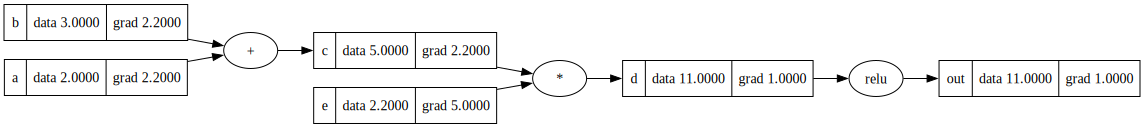

In [4]:
# Verify the recently added ReLU functionality
a = Value(2)
a.label = "a"
b = Value(3)
b.label = "b"
c = a + b
c.label = "c"
e = Value(2.2)
e.label = "e"
d = c * e
d.label = "d"
out = d.relu()
out.label = "out"

print(out)
out.backward()
draw_dot(out)

## Binary Classification

In [5]:
# Create data
import random

random.seed(42)
np.random.seed(42)

from sklearn.datasets import make_moons, make_blobs

ndArray: TypeAlias = npt.NDArray[np.int_ | np.float_]

X, y = make_moons(n_samples=100, noise=0.1)

y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

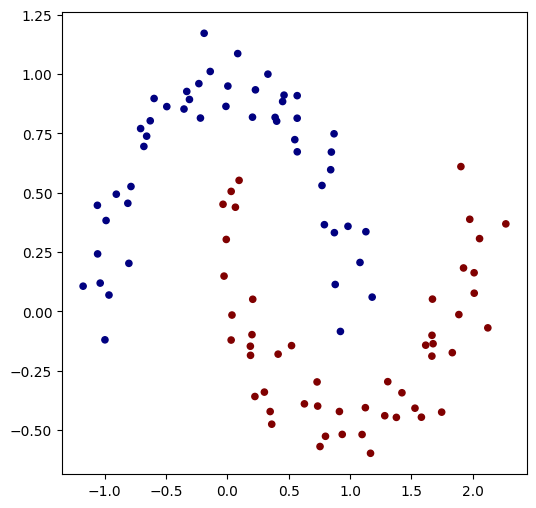

In [6]:
# Make y be -1 or 1
y: ndArray = (2 * y) - 1

# visualize in 2D
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap="jet")
plt.show()

In [7]:
X.shape

(100, 2)

In [8]:
np.random.uniform(-1, 1)

0.8304274552529609

In [9]:
# Initialize the model
n_inputs: int = X.shape[1]
# 16 neurons in the 1st layer, 16 neurons in the 2nd layer, and 1 neuron in the 3rd layer.
out_layers: list[int] = [16, 16, 1]
clf: MLP = MLP(n_inputs=n_inputs, out_layers=out_layers)
console.print(clf)

MLP of [Layer of [ReLUNeuron(n_weights=2), ReLUNeuron(n_weights=2), ReLUNeuron(n_weights=2), 
ReLUNeuron(n_weights=2), ReLUNeuron(n_weights=2), ReLUNeuron(n_weights=2), ReLUNeuron(n_weights=2), 
ReLUNeuron(n_weights=2), ReLUNeuron(n_weights=2), ReLUNeuron(n_weights=2), ReLUNeuron(n_weights=2), 
ReLUNeuron(n_weights=2), ReLUNeuron(n_weights=2), ReLUNeuron(n_weights=2), ReLUNeuron(n_weights=2), 
ReLUNeuron(n_weights=2)], Layer of [ReLUNeuron(n_weights=16), ReLUNeuron(n_weights=16), ReLUNeuron(n_weights=16), 
ReLUNeuron(n_weights=16), ReLUNeuron(n_weights=16), ReLUNeuron(n_weights=16), ReLUNeuron(n_weights=16), 
ReLUNeuron(n_weights=16), ReLUNeuron(n_weights=16), ReLUNeuron(n_weights=16), ReLUNeuron(n_weights=16), 
ReLUNeuron(n_weights=16), ReLUNeuron(n_weights=16), ReLUNeuron(n_weights=16), ReLUNeuron(n_weights=16), 
ReLUNeuron(n_weights=16)], Layer of [LinearNeuron(n_weights=16)]]

In [10]:
print("number of parameters", len(clf.parameters()))
clf.layers

number of parameters 337


[Layer of [ReLUNeuron(n_weights=2), ReLUNeuron(n_weights=2), ReLUNeuron(n_weights=2), ReLUNeuron(n_weights=2), ReLUNeuron(n_weights=2), ReLUNeuron(n_weights=2), ReLUNeuron(n_weights=2), ReLUNeuron(n_weights=2), ReLUNeuron(n_weights=2), ReLUNeuron(n_weights=2), ReLUNeuron(n_weights=2), ReLUNeuron(n_weights=2), ReLUNeuron(n_weights=2), ReLUNeuron(n_weights=2), ReLUNeuron(n_weights=2), ReLUNeuron(n_weights=2)],
 Layer of [ReLUNeuron(n_weights=16), ReLUNeuron(n_weights=16), ReLUNeuron(n_weights=16), ReLUNeuron(n_weights=16), ReLUNeuron(n_weights=16), ReLUNeuron(n_weights=16), ReLUNeuron(n_weights=16), ReLUNeuron(n_weights=16), ReLUNeuron(n_weights=16), ReLUNeuron(n_weights=16), ReLUNeuron(n_weights=16), ReLUNeuron(n_weights=16), ReLUNeuron(n_weights=16), ReLUNeuron(n_weights=16), ReLUNeuron(n_weights=16), ReLUNeuron(n_weights=16)],
 Layer of [LinearNeuron(n_weights=16)]]

In [11]:
X[:3]

array([[ 1.58202308, -0.44581483],
       [ 0.0660451 ,  0.4392075 ],
       [ 0.73663111, -0.39896339]])

In [12]:
def loss(model: Any, batch_size=None):
    """
    Computes the loss and accuracy for a batch of data using the binary classification model.
    Copied!

    Params:
    ------
        model (Any): The model to use for computing the loss and accuracy.
        batch_size (int, optional): The size of the batch to use. If `None`, the entire dataset is used.

    Returns:
    -------
        tuple: A tuple containing the total loss and the accuracy for the batch.
    """
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]

    # forward the model to get scores
    scores = list(map(model, inputs))

    # svm "max-margin" loss
    losses = [(1 + -yi * scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))

    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p * p for p in model.parameters()))
    total_loss = data_loss + reg_loss

    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

In [13]:
# Test the function
total_loss, acc = loss(model=clf)
print(total_loss, acc)

Value(data=1.2977591779139135, grad=0.0) 0.2


In [14]:
# optimization
for k in range(100):

    # forward
    total_loss, acc = loss(model=clf)

    # backward
    clf.zero_grad()
    total_loss.backward()

    # Update (sgd) with learning rate decay
    learning_rate: float = 1.0 - 0.9 * k / 100
    for p in clf.parameters():
        p.data -= learning_rate * p.grad

    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

step 0 loss 1.2977591779139135, accuracy 20.0%
step 1 loss 0.9233409226063365, accuracy 68.0%
step 2 loss 0.9033237644150103, accuracy 76.0%
step 3 loss 0.4589929032852663, accuracy 79.0%
step 4 loss 0.43272926891905905, accuracy 79.0%
step 5 loss 0.41615199744888554, accuracy 82.0%
step 6 loss 0.5154569913821353, accuracy 80.0%
step 7 loss 0.38046118496404885, accuracy 82.0%
step 8 loss 0.34520540354471163, accuracy 84.0%
step 9 loss 0.3183679999178009, accuracy 86.0%
step 10 loss 0.3463195816675012, accuracy 84.0%
step 11 loss 0.27566596590223275, accuracy 87.0%
step 12 loss 0.24220922430014225, accuracy 88.0%
step 13 loss 0.2145324473605564, accuracy 89.0%
step 14 loss 0.2026743976313357, accuracy 91.0%
step 15 loss 0.27409461010092145, accuracy 88.0%
step 16 loss 0.23643648606568504, accuracy 91.0%
step 17 loss 0.3105844045772599, accuracy 89.0%
step 18 loss 0.2070970061189472, accuracy 90.0%
step 19 loss 0.17540275634612362, accuracy 92.0%
step 20 loss 0.1596891847735645, accuracy

(-1.5978882018302847, 2.1521117981697153)

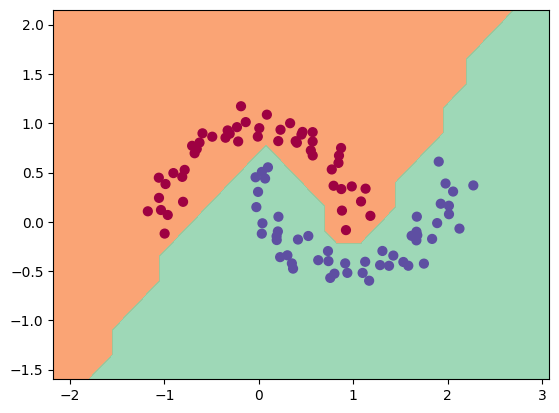

In [15]:
# Visualize decision boundary
h: float = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Xmesh: ndArray = np.c_[xx.ravel(), yy.ravel()]
inputs: list[Value] = [list(map(Value, xrow)) for xrow in Xmesh]
scores: list[Value] = list(map(clf, inputs))
Z: ndArray = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())